In [54]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr 

In [3]:
def myFunction(df):
    job_ids = df['job_id'].unique()
    df = df.drop(df.columns[[1,4,6,7,8,12]], axis=1)
    df=df.sort_values(['timestamp'])
    df = df[df.timestamp != 0]
    output_df = pd.DataFrame(columns=["job_id","task_index","waiting_time","resource_usage"])
    i = 1
    for job_id in job_ids:
        i=i+1
        small_df = df[df['job_id'] == job_id]
        if not small_df.empty:
    #         print "smalldf",small_df
            task_indexes = small_df['task_index'].unique()
    #         print "task_indexes",task_indexes
            for task_index in task_indexes:
                smallest_df1 = small_df[small_df['task_index'] == task_index]
                smallest_df1 = smallest_df1[smallest_df1['event_type'] == 0]
    #             print "smdf1",smallest_df1.iloc[0]
                smallest_df2 = small_df[small_df['task_index'] == task_index] 
                smallest_df2 = smallest_df2[smallest_df2['event_type'] == 1]
    #             print "smdf2",smallest_df2.iloc[0]
                if not ( smallest_df1.empty or smallest_df2.empty ):
                    row0 = smallest_df1.iloc[0]
                    row1 = smallest_df2.iloc[0]
    #                 print row0
    #                 print row1
                    resource_usage = (row0.cpu_req + row0.ram_req + row0.space_req)/3
                    job_idd = row0.job_id
                    task_indexx = row0.task_index
                    waiting_time = row1.timestamp - row0.timestamp
                    if not waiting_time < 0:
                        output_data = pd.DataFrame(columns=["job_id","task_index","waiting_time","resource_usage"],data=[[job_idd,task_indexx,waiting_time,resource_usage]])
        #                 print output_data
                        output_df = output_df.append(output_data)
                    break

    #         print small_df
    #     if i == 1000:
    #         break
    return output_df

In [30]:
data_dir = "./data/task_events_input/"
output_data_dir = './data/task_events_input/part-00000-of-00500.csv.gz'

task_events_header = ['job_id','task_index','waiting_time','resource_usage']

In [31]:
output_dataframe = pd.DataFrame()
for i in range(500):
    file_str = str(i).zfill(5) 
    print file_str
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv",delimiter='\t',index_col=0)
#     print df
    df.columns = task_events_header
    output_dataframe = output_dataframe.append(df)
    output_data_dir = "./data/task_events_input/part-"+file_str+"-of-00500.csv"
    out_df.to_csv(output_data_dir, sep='\t')

# grouped_data = output_dataframe.groupby(['job_id']).mean()
# grouped_data = grouped_data[grouped_data['waiting_time']>1000000000]

00000
00001
00002
00003
00004
00005
00006
00007
00008
00009
00010
00011
00012
00013
00014
00015
00016
00017
00018
00019
00020
00021
00022
00023
00024
00025
00026
00027
00028
00029
00030
00031
00032
00033
00034
00035
00036
00037
00038
00039
00040
00041
00042
00043
00044
00045
00046
00047
00048
00049
00050
00051
00052
00053
00054
00055
00056
00057
00058
00059
00060
00061
00062
00063
00064
00065
00066
00067
00068
00069
00070
00071
00072
00073
00074
00075
00076
00077
00078
00079
00080
00081
00082
00083
00084
00085
00086
00087
00088
00089
00090
00091
00092
00093
00094
00095
00096
00097
00098
00099
00100
00101
00102
00103
00104
00105
00106
00107
00108
00109
00110
00111
00112
00113
00114
00115
00116
00117
00118
00119
00120
00121
00122
00123
00124
00125
00126
00127
00128
00129
00130
00131
00132
00133
00134
00135
00136
00137
00138
00139
00140
00141
00142
00143
00144
00145
00146
00147
00148
00149
00150
00151
00152
00153
00154
00155
00156
00157
00158
00159
00160
00161
00162
00163
00164
00165
0016

In [49]:
print output_dataframe

          job_id  task_index  waiting_time  resource_usage
0   5.950956e+09       236.0  1.127399e+09    1.579718e-02
0   6.238340e+09        94.0  3.718773e+07    3.404938e-02
0   6.254456e+09       422.0  2.449803e+06    1.477302e-02
0   5.307854e+09         1.0  5.408190e+08    1.019812e-01
0   5.150430e+08         0.0  1.932841e+06    1.045517e-02
0   6.254837e+09         0.0  1.552183e+06    7.395383e-03
0   6.035592e+09         8.0  6.918426e+06    3.144605e-02
0   6.252901e+09      1142.0  1.649664e+09    2.295420e-02
0   6.254922e+09         7.0  3.700404e+06    2.239605e-02
0   6.254927e+09         0.0  1.920757e+06    3.942050e-03
0   6.254911e+09         0.0  1.916263e+06    2.498636e-02
0   5.285926e+09         0.0  1.915796e+06    2.291872e-02
0   3.893898e+09         0.0  1.616346e+06    2.370679e-03
0   6.254926e+09         0.0  3.264468e+07    3.883272e-02
0   6.254927e+09         0.0  2.448834e+06    1.306985e-02
0   4.963595e+09       112.0  1.760215e+07    5.381067e-

In [50]:
grouped_data = output_dataframe.groupby(['job_id']).mean()
grouped_data = grouped_data[grouped_data['waiting_time']>1000000000]

In [51]:
grouped_data

,task_index,waiting_time,resource_usage
job_id,,,
5.150430e+08,6.0,1.023251e+09,0.045559
5.390365e+09,13.0,1.023253e+09,0.015841
5.576498e+09,0.0,1.447993e+09,0.026708
5.880918e+09,0.0,1.624297e+09,0.137347
5.950956e+09,236.0,1.127399e+09,0.015797
5.993060e+09,0.0,1.656363e+09,0.083292
6.117801e+09,2.0,1.003020e+09,0.032769
6.158642e+09,0.0,1.639130e+09,0.085477
6.218406e+09,36.0,1.106910e+09,0.020459


In [47]:
output_dataframe['waiting_time'].corr(output_dataframe['resource_usage'])

0.28922581490519295

In [55]:
pearsonr(output_dataframe['waiting_time'],output_dataframe['resource_usage'])

(0.28922581490519111, 0.0)

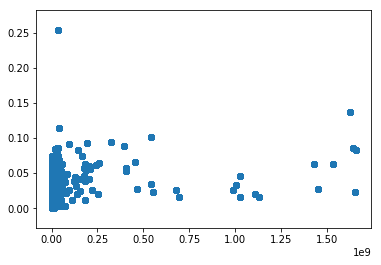

In [35]:
# plt.plot([x for x in range(len(mean_id_list))],mean_id_list)
plt.scatter(output_dataframe['waiting_time'].tolist(),output_dataframe['resource_usage'].tolist())
plt.show()

In [43]:
# grouped_data = grouped_data[grouped_data['resource_usage'] != 0]
# grouped_data.dropna(axis=0,inplace=True)

In [37]:
# q1 = grouped_data['resource_usage'].quantile(0.25)
# q3 = grouped_data['resource_usage'].quantile(0.75)
# iqr = q3-q1
# grouped_data = grouped_data[(grouped_data['resource_usage'] > (q1-1.5*iqr) ) & (grouped_data['resource_usage'] < (q3+1.5*iqr))]





In [38]:
# q1 = grouped_data['waiting_time'].quantile(0.25)
# q3 = grouped_data['waiting_time'].quantile(0.75)
# iqr = q3-q1
# grouped_data = grouped_data[(grouped_data['waiting_time'] > (q1-1.5*iqr) ) & (grouped_data['waiting_time'] < (q3+1.5*iqr))]

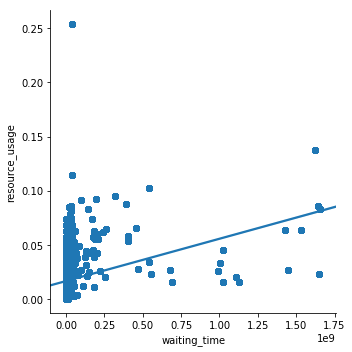

In [52]:
# # library & dataset
# import seaborn as sns
# # df = sns.load_dataset('iris')
 
# # use the function regplot to make a scatterplot
# # sns.regplot(x=df["sepal_length"], y=df["sepal_width"])
# #sns.plt.show()
 
# # Without regression fit:

# # sns.regplot(x=grouped_data['waiting_time'], y=grouped_data['resource_usage'], fit_reg=False)
# # sns.plt.show()


# sns.lmplot('waiting_time', 'resource_usage', data=output_dataframe, fit_reg=True)
# plt.show()